<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
# Group EDA II
<br>
<img src="https://snag.gy/LZToF2.jpg" style="width: 500px">
<br>
The focus of this group EDA practice, is to present within the given frame, to a high level, non-technical audience.  Please give focus to the given goals and how achievable they are in terms of factual numbers.  Not everything is achievable, so it's important to explain why to an audience that doesn't know anything about numbers.  In the event that a goal can't be achieved, explain why in simple language, backing up your reasoning with measurable details.

However, it's also important to look at the details and address the class with your approach.  A notebook presentation is fine for the technical aspect but your main priority should be to address a non-technical audience.  Keep in mind that it's good to explain your code, but **always frame everything you present in terms of the goals**.  If what you're choosing to present isn't relevent to the goals, please consider ommitting those details.

Each group has a slightly different challenge but it is possible to use what we learned about linear regression, regularization, and exploratory analysis so far.

---

In [37]:
# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline

## Adult Education

You are on the data science team at a private school.  The marketing department has approached us to help write a series of blog posts that can help sell the value proposition of the school.  Secondarily, business development is very interested in developing online products in emerging markets.

The goals are:

- Describe the areas of highest value within the dataset
- Describe the characteristics that target value
- Identify possible markets and demographic characteristics for business development

Presentation requirements:

- %50 of presentation must address a non-technical audience 
- Someone who hasn't presented yet must take lead on presentation

In [1]:
import pandas as pd

df = pd.read_csv("../../../datasets/adult_salary/adult.csv")


## FIFA

You are working for an advertising analytics consulting company.  Your client, a name brand television network, needs help deciding how to re-prioritize the pricing structure for new customers, but also incentivize existing clients to convert to new partnerships sponsors for teams and players.

Goals:
- Determine a metric to decide how exciting a game is
  - Engineer this feature using existing data
- Suggest a pricing structure tied to overall value of "game excitement"

Presentation requirements:

- %50 of presentation must address a non-technical audience 
- Someone who hasn't presented yet must take lead on presentation


In [4]:
df = pd.read_csv("../../../datasets/fifa_goals/fifa_goals.csv")
df

,game_id,minute,player,team1score,team2score
0,1,18,Schiavio,1,0
1,1,20,Orsi,2,0
2,1,29,Schiavio,3,0
3,1,57,Donelli,3,1
4,1,63,Ferrari,4,1
5,1,64,Schiavio,5,1
6,1,69,Orsi,6,1
7,1,90+,Meazza,7,1
8,2,18,Nicolas,0,1
9,2,44,Sindelar,1,1


0        18
1        20
2        29
3        57
4        63
5        64
6        69
7       90+
8        18
9        44
10       93
11      109
12      118
13       25
14       29
15       43
16       49
17       66
18       70
19       87
20       11
21       50
22       67
23        7
24       19
25       43
26       69
27       84
28        4
29        9
       ... 
2177      4
2178      7
2179     18
2180     60
2181     65
2182     88
2183      9
2184     85
2185     12
2186     47
2187     75
2188     86
2189    111
2190    116
2191     31
2192     47
2193     51
2194     54
2195     61
2196     64
2197     89
2198     16
2199     22
2200     59
2201     79
2202      6
2203      8
2204     10
2205     18
2206     84
Name: minute, dtype: object

In [27]:
df['offset'] = df.index
for row in df.values:
    print row[-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
def calc_group(group_df):
    group_df['game100'] = group_df['game_id'] * 100
    
    max_
    
    return group_df

df.groupby('game_id').apply(calc_group)

,game_id,minute,player,team1score,team2score,offset,game100
0,1,18,Schiavio,1,0,0,100
1,1,20,Orsi,2,0,1,100
2,1,29,Schiavio,3,0,2,100
3,1,57,Donelli,3,1,3,100
4,1,63,Ferrari,4,1,4,100
5,1,64,Schiavio,5,1,5,100
6,1,69,Orsi,6,1,6,100
7,1,90+,Meazza,7,1,7,100
8,2,18,Nicolas,0,1,8,200
9,2,44,Sindelar,1,1,9,200


In [33]:
updated

""


## Mobile Madness

In an effort to extend account lifetime of existing customers, we NEED to identify customers for targeted A/B experiments.  Before we do that, we need to really have a good level of certainty around who is going to churn and why.

Goals:

- Research the concept of "churn"
- Identify behaviors strongly coorelated with churn in this dataset
- Suggest what we should look for to consider A/B tests

Presentation requirements:
- %50 of presentation must address a non-technical audience
- Someone who hasn't presented yet must take lead on presentation


In [11]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy

from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
State                     667 non-null object
Account length            667 non-null int64
Area code                 667 non-null int64
International plan        667 non-null object
Voice mail plan           667 non-null object
Number vmail messages     667 non-null int64
Total day minutes         667 non-null float64
Total day calls           667 non-null int64
Total day charge          667 non-null float64
Total eve minutes         667 non-null float64
Total eve calls           667 non-null int64
Total eve charge          667 non-null float64
Total night minutes       667 non-null float64
Total night calls         667 non-null int64
Total night charge        667 non-null float64
Total intl minutes        667 non-null float64
Total intl calls          667 non-null int64
Total intl charge         667 non-null float64
Customer service calls    667 non-null int64
Churn                

In [14]:
df = pd.read_csv("/Users/austinwhaley/Desktop/DSI-SF-4-austinmwhaley/datasets/churn_rate/churn-bigml-20.csv")

In [15]:
df['Churn'] = df['Churn'].map(lambda x: 1 if x == True else 0)

In [33]:
X = df.select_dtypes(include=['int64'])
X = X.drop('Churn', 1)
y = df['Churn']

In [62]:
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
# coefs = []
EnetCV = ElasticNetCV(normalize=True)
EnetCV.fit(X, y)
# coefs.append(EnetCV.coef_)
# EnetCV.p
# print coefs
# print X.columns
# print cross_val_predict(EnetCV, X, y)
#print cross_val_score(EnetCV, X, y)
print EnetCV.score(X, y)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)
print lin_reg.score(X, y)
print lin_reg.coef_

0.0587324541351
0.0695329460823
[ 0.00013997  0.00022333 -0.0025194   0.00048496  0.00087389 -0.00016792
  0.00101833  0.06165009]


In [42]:
coef_plotter(EnetCV.alphas_, coefs, X.columns, to_alpha=0, regtype='elastic net')

IndexError: list index out of range

In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


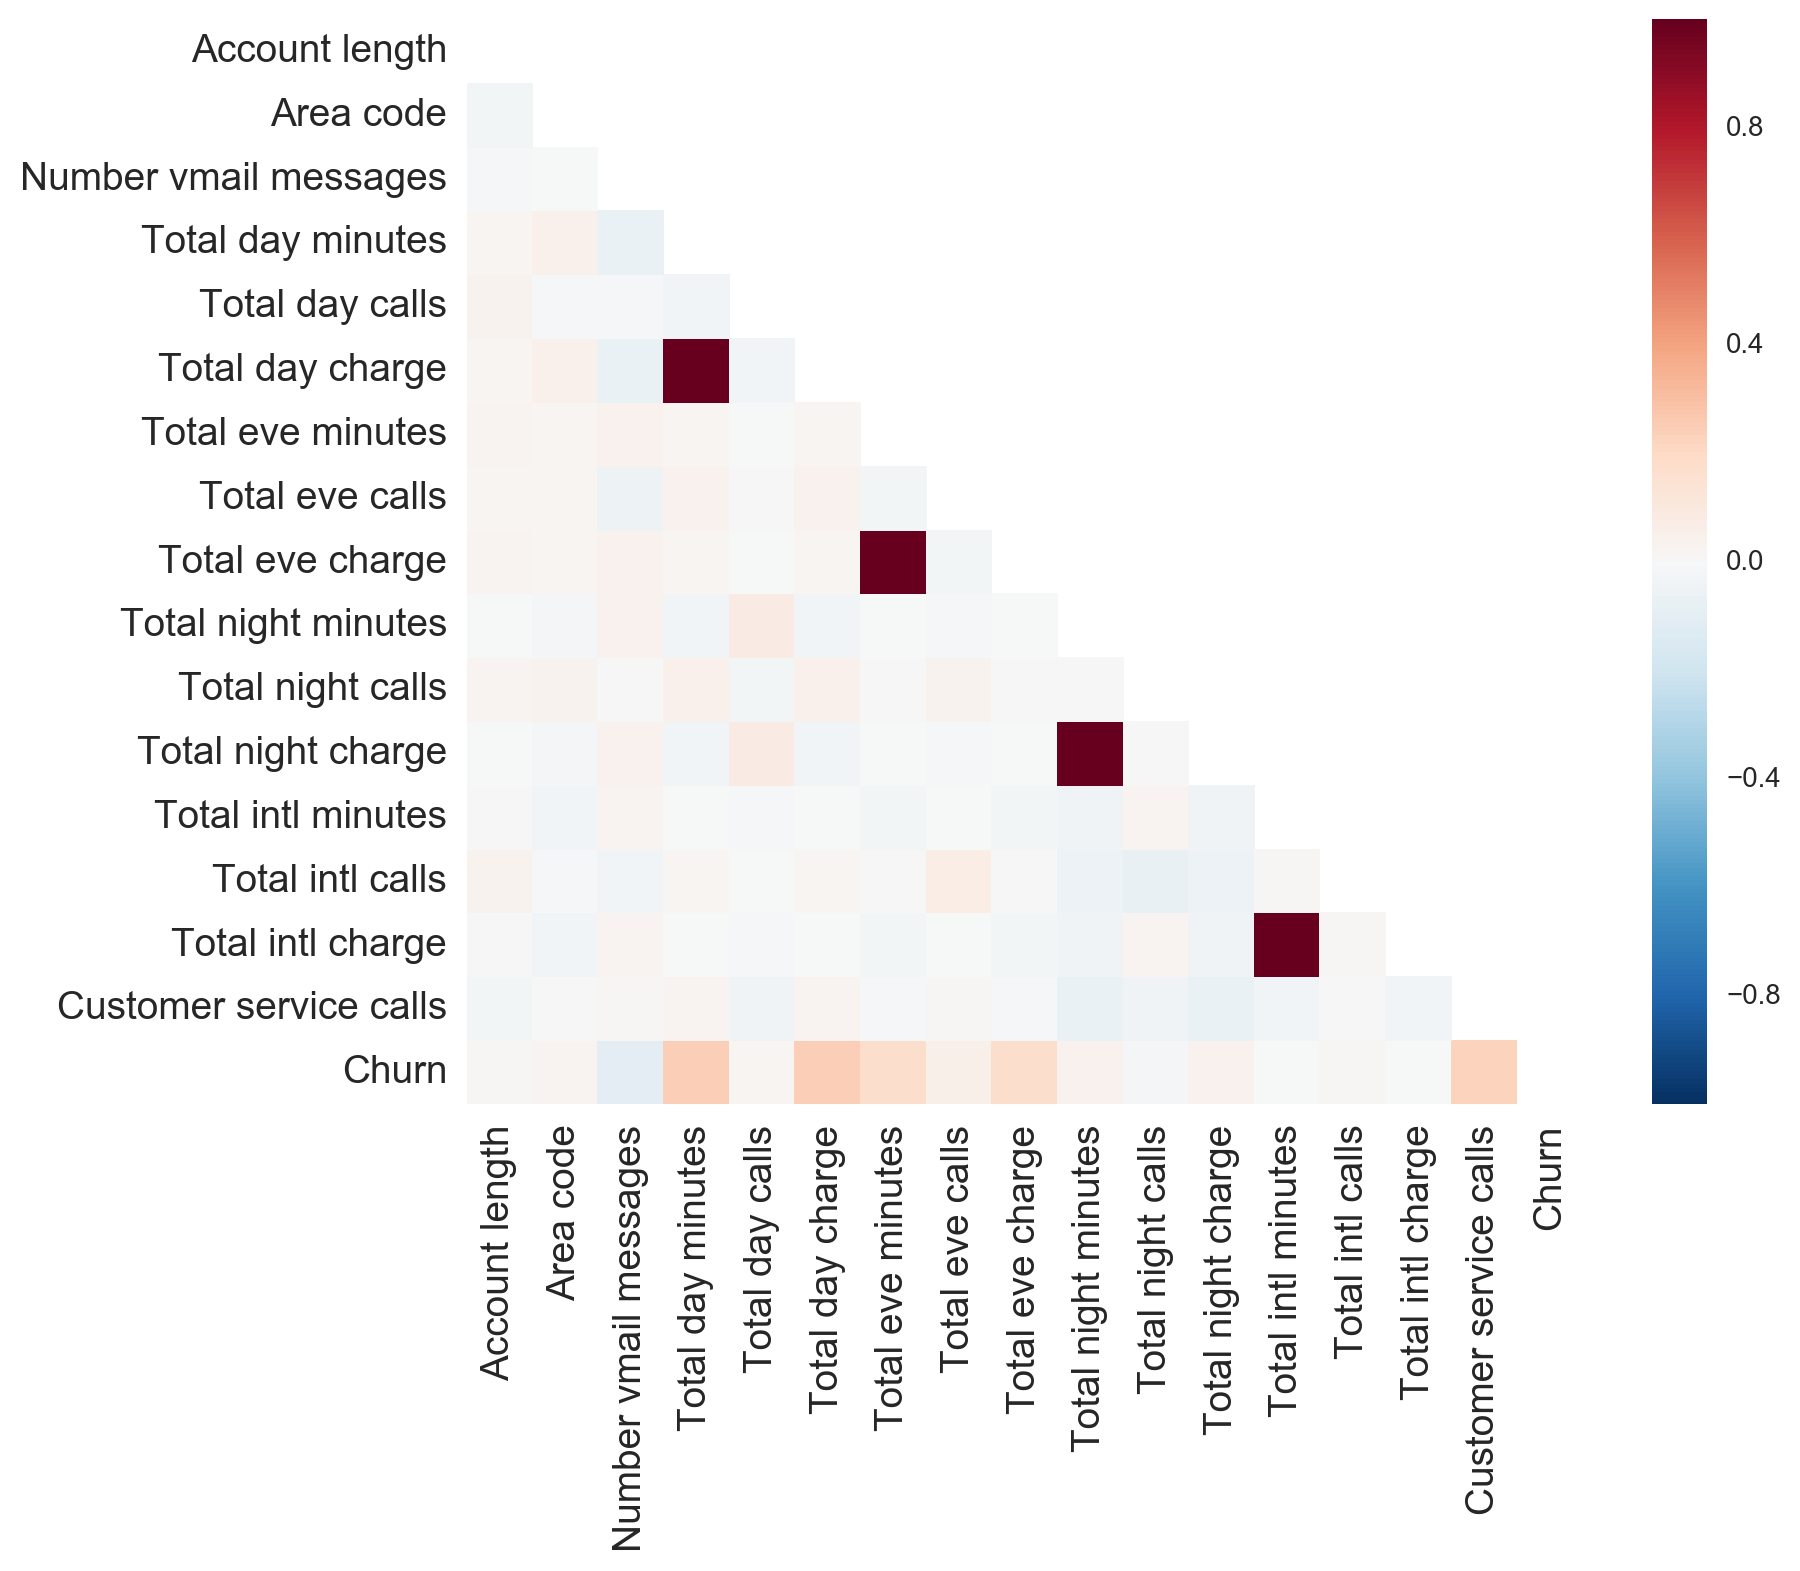

In [17]:
df_corr = df.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from 


lin_reg = LinearRegression(normalize=True)

## Marathon

The overlords of marathon planning committees have petitioned a group of DSI students to help with their decision to plan future sites for marathons.  The the marathon super-pac believes that people who engage with events are drawn to the challenege aspects of the event as a core value (harder marathons == better value).  However, a small contingency within the ranks of the marathon super-pac believe that the spirit of events supercedes the element of difficulty because of the phenomena of spectatorship.

Goals
- Suggest qualities of high performing events 
  - Engineer new features / metrics to evaluate
  - The goal of the committee is to use these metrics to decide future sites for events
- Settle the dispute within the committee about the value of challenege vs popularity
  - Which is most important?
  - Are they valuable for different reasons?
  
Presentation requirements:
- %75 of presentation must address a non-technical audience
- Someone who hasn't presented yet must take lead on presentation

In [5]:
# This project contains multiple datasets
df = pd.read_csv("../../../../DSI-SF/datasets/marathons/Winners.csv")
df

,Winner,Country,Category,Marathons,Wikipedia Page,Image,Description,Date of birth,Year of first major marathon win,Age of first major marathon victory
0,Beth Bonner,United States,Female Winner,New York City 1971,http://en.wikipedia.org/wiki/Beth_Bonner,NaN,"Beth Bonner (Elizabeth Bonner; June 9, 1952 - ...",1952.0,1971.0,19.0
1,Hitomi Niiya,Japan,Female Winner,Tokyo 2007,http://en.wikipedia.org/wiki/Hitomi_Niiya,//upload.wikimedia.org/wikipedia/commons/thumb...,"Hitomi Niiya(新谷 仁美,Niiya Hitomi?, born 26 Febr...",1988.0,2007.0,19.0
2,Ham Kee-Yong,South Korea,Male Winner,Boston 1950,http://en.wikipedia.org/wiki/Ham_Kee-Yong,NaN,"Ham Kee-yong (born November 14, 1930) is a for...",1930.0,1950.0,20.0
3,Kim Merritt,United States,Female Winner,"Boston 1976, New York City 1975",http://en.wikipedia.org/wiki/Kim_Merritt,NaN,"Kim Merritt (born May 22, 1955 in Racine, Wisc...",1955.0,1975.0,20.0
4,Shigeki Tanaka,Japan,Male Winner,Boston 1951,http://en.wikipedia.org/wiki/Shigeki_Tanaka,NaN,"Shigeki Tanaka(田中 茂樹,Tanaka Shigeki?, born Apr...",1931.0,1951.0,20.0
5,Thomas Longboat,Canada,Male Winner,Boston 1907,http://en.wikipedia.org/wiki/Tom_Longboat,//upload.wikimedia.org/wikipedia/commons/thumb...,"Cogwagee (Thomas Charles Longboat) (June 4, 18...",1887.0,1907.0,20.0
6,Aberu Kebede,Ethiopia,Female Winner,"Berlin 2012, Berlin 2010, Tokyo 2013",http://en.wikipedia.org/wiki/Aberu_Kebede,//upload.wikimedia.org/wikipedia/commons/thumb...,Aberu Kebede Shewaye (born 12 September 1989) ...,1989.0,2010.0,21.0
7,Frederick Lorz,United States,Male Winner,Boston 1905,http://en.wikipedia.org/wiki/Frederick_Lorz,//upload.wikimedia.org/wikipedia/commons/thumb...,"Frederick ""Fred"" Lorz (June 5, 1884 – February...",1884.0,1905.0,21.0
8,"John ""Jack"" Caffery",Canada,Male Winner,"Boston 1900, Boston 1901",http://en.wikipedia.org/wiki/Jack_Caffery,//upload.wikimedia.org/wikipedia/commons/d/d5/...,"John (""Jack"") Peter Caffery (May 21, 1879 – Fe...",1879.0,1900.0,21.0
9,Johnny Miles,Canada,Male Winner,"Boston 1926, Boston 1929",http://en.wikipedia.org/wiki/Johnny_Miles,//upload.wikimedia.org/wikipedia/en/thumb/3/30...,"1925 Canadian 5-mile championJohn ""Johnny"" C. ...",1905.0,1926.0,21.0


## Movie Weekend + Timeseries Review

This is a brief intro / review to timeseries

In [47]:
df = pd.read_csv("../../../datasets/movie_weekend/movie_weekend.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 5 columns):
NUMBER                 1254 non-null float64
MOVIE                  1254 non-null object
WEEK_NUM               1254 non-null float64
WEEKEND_PER_THEATER    1254 non-null float64
WEEKEND_DATE           1254 non-null object
dtypes: float64(3), object(2)
memory usage: 50.1+ KB


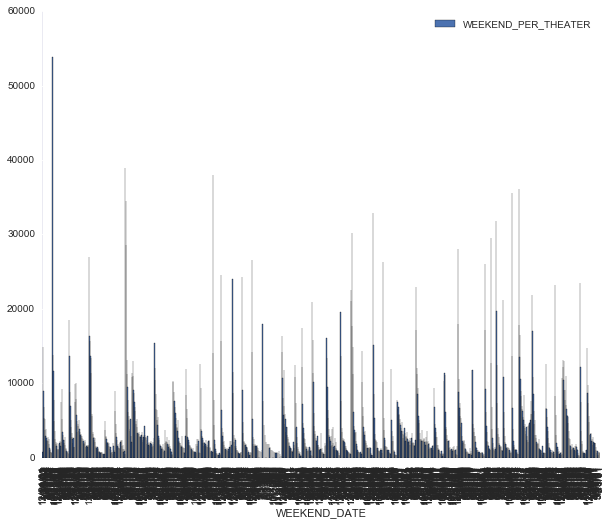

In [48]:
df.plot(kind="bar", x="WEEKEND_DATE", y="WEEKEND_PER_THEATER", figsize=(10,8))

In [49]:
# convert date to proper type
df['WEEKEND_DATE'] = pd.to_datetime(df['WEEKEND_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 5 columns):
NUMBER                 1254 non-null float64
MOVIE                  1254 non-null object
WEEK_NUM               1254 non-null float64
WEEKEND_PER_THEATER    1254 non-null float64
WEEKEND_DATE           1254 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 50.1+ KB


In [50]:
# set our index to a datetime type object series
df.index = df['WEEKEND_DATE']
df.head()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
WEEKEND_DATE,,,,,
2001-12-21,1.0,A Beautiful Mind,1.0,701.0,2001-12-21
2001-12-28,1.0,A Beautiful Mind,2.0,14820.0,2001-12-28
2002-01-04,1.0,A Beautiful Mind,3.0,8940.0,2002-01-04
2002-01-11,1.0,A Beautiful Mind,4.0,6850.0,2002-01-11
2002-01-18,1.0,A Beautiful Mind,5.0,5280.0,2002-01-18


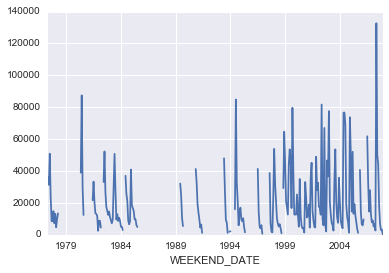

In [51]:
df['WEEKEND_PER_THEATER'].resample("M").sum().plot()

# for a full list of period segments, check out: http://stackoverflow.com/questions/17001389/pandas-resample-documentation


In [52]:
df.head()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
WEEKEND_DATE,,,,,
2001-12-21,1.0,A Beautiful Mind,1.0,701.0,2001-12-21
2001-12-28,1.0,A Beautiful Mind,2.0,14820.0,2001-12-28
2002-01-04,1.0,A Beautiful Mind,3.0,8940.0,2002-01-04
2002-01-11,1.0,A Beautiful Mind,4.0,6850.0,2002-01-11
2002-01-18,1.0,A Beautiful Mind,5.0,5280.0,2002-01-18


In [53]:
import numpy as np

weekday_map = {
    0: "Sun",
    1: "Mon",
    2: "Tues",
    3: "Wed",
    4: "Thurs",
    5: "Fri",
    6: "Sat"
}

df['year'] = df.index.map(lambda value: value.year)
df['weekday'] = df.index.map(lambda value: weekday_map[value.dayofweek] if value.dayofweek > 0 else "Unknown")

In [54]:
df.head()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE,year,weekday
WEEKEND_DATE,,,,,,,
2001-12-21,1.0,A Beautiful Mind,1.0,701.0,2001-12-21,2001.0,Thurs
2001-12-28,1.0,A Beautiful Mind,2.0,14820.0,2001-12-28,2001.0,Thurs
2002-01-04,1.0,A Beautiful Mind,3.0,8940.0,2002-01-04,2002.0,Thurs
2002-01-11,1.0,A Beautiful Mind,4.0,6850.0,2002-01-11,2002.0,Thurs
2002-01-18,1.0,A Beautiful Mind,5.0,5280.0,2002-01-18,2002.0,Thurs


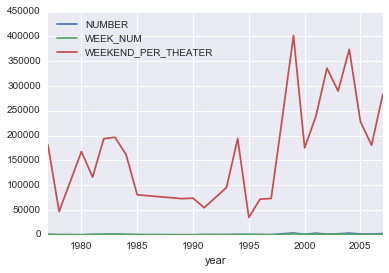

In [55]:
# df.resample("A").sum()
df.groupby("year").sum().plot()

## Data Cleaning / Apply / Map / Plotting Review

In [172]:
df = pd.read_csv("../../../datasets/highest_paid_athletes/Athletes.csv")
df.head()

,Rank,Name,Sport,Total Pay,Salary/Winnings,Endorsements,Nation,Gender,Year of birth,Birth Date,Place of Birth,Height (cm),Wikipedia Page,dbpedia Page,Image,Description
0,55,Aaron Rodgers,Football,"$22,000,000","$14,500,000","$7,500,000",United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,"$17,700,000","$8,700,000","$9,000,000",Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,"$21,500,000","$21,100,000","$400,000",United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."
3,48,Alex Rodriguez,Baseball,"$22,900,000","$22,600,000","$300,000",United States,Male,1975,27/07/1975,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju..."
4,93,Alfonso Soriano,Baseball,"$18,050,000","$18,000,000","$50,000",Dominican Republic,Male,1976,7/01/1976,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197..."


In [180]:
# df['Birth Date'].map(lambda value: value.split("/")[0]).unique()
df['Birth Date'].map(lambda value: value.split("/")[1]).unique()
# df['Birth Date'].map(lambda value: value.split("/")[2]).unique()


array(['12', '07', '05', '01', '11', '03', '08', '02', '06', '10', '04',
       '09'], dtype=object)

In [130]:
import sys
sys.path.append("../../../utils/student_caller/")

from caller import StudentCaller

sc = StudentCaller()
sc.set_resource("students", "students-dsi-sf-4.txt")
sc.load_resource("students", randomize=True)
# sc.set_absent_students(["reem"])

In [131]:
sc.get_student()

'andrew w.'

# Replace spaces in columns and lowercase

In [181]:
df.columns = df.columns.map(lambda x: x.replace(" ",'_').lower().replace("(", "").replace(")", "").replace("/", "_"))

In [133]:
df.head()

,rank,name,sport,total_pay,salary_winnings,endorsements,nation,gender,year_of_birth,birth_date,place_of_birth,height_cm,wikipedia_page,dbpedia_page,image,description
0,55,Aaron Rodgers,Football,"$22,000,000","$14,500,000","$7,500,000",United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,"$17,700,000","$8,700,000","$9,000,000",Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,"$21,500,000","$21,100,000","$400,000",United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."
3,48,Alex Rodriguez,Baseball,"$22,900,000","$22,600,000","$300,000",United States,Male,1975,27/07/1975,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju..."
4,93,Alfonso Soriano,Baseball,"$18,050,000","$18,000,000","$50,000",Dominican Republic,Male,1976,7/01/1976,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197..."


# Check types, identify key areas of cleaning

In [92]:
sc.get_student()

'katerina'

In [134]:
df.head(3)

,rank,name,sport,total_pay,salary_winnings,endorsements,nation,gender,year_of_birth,birth_date,place_of_birth,height_cm,wikipedia_page,dbpedia_page,image,description
0,55,Aaron Rodgers,Football,"$22,000,000","$14,500,000","$7,500,000",United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,"$17,700,000","$8,700,000","$9,000,000",Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,"$21,500,000","$21,100,000","$400,000",United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
rank               100 non-null int64
name               100 non-null object
sport              100 non-null object
total_pay          100 non-null object
salary_winnings    100 non-null object
endorsements       100 non-null object
nation             100 non-null object
gender             100 non-null object
year_of_birth      100 non-null int64
birth_date         100 non-null object
place_of_birth     100 non-null object
height_cm          100 non-null int64
wikipedia_page     100 non-null object
dbpedia_page       100 non-null object
image              99 non-null object
description        100 non-null object
dtypes: int64(3), object(13)
memory usage: 12.6+ KB


# Katerina's recs:

- COnvert types
  - total_pay
  - salarywinnings
  - endorsements
  - birthdate
  
## Jim's recs (EDA / Validation (not model validation))
- Check expected value ranges
  - Sport
  - Nation
  - Gender
  - Height_cm
  


# Clean columns / variables / features with an apply function

- total_pay
- salarywinnings
- endorsements

In [113]:
sc.get_student()

'ty'

In [136]:
df.head(2)
df['total_pay'] = df['total_pay'].apply(lambda x: float(x.replace('$','').replace(',','')))
df['salarywinnings'] = df['salarywinnings'].apply(lambda x: float(x.replace('$','').replace(',','')))
df['endorsements'] = df['endorsements'].apply(lambda x: float(x.replace('$','').replace(',','')))
df.head(5)
df.info()

KeyError: 'salarywinnings'

In [137]:
df.columns

Index([u'rank', u'name', u'sport', u'total_pay', u'salary_winnings',
       u'endorsements', u'nation', u'gender', u'year_of_birth', u'birth_date',
       u'place_of_birth', u'height_cm', u'wikipedia_page', u'dbpedia_page',
       u'image', u'description'],
      dtype='object')

In [182]:
## Alternative apply function

df[['total_pay', 'salary_winnings', 'endorsements']] = df[['total_pay', 'salary_winnings', 'endorsements']].apply(lambda value: value.str.replace("$", "").str.replace(",", "")).astype(float)

In [144]:
df.head()

,rank,name,sport,total_pay,salary_winnings,endorsements,nation,gender,year_of_birth,birth_date,place_of_birth,height_cm,wikipedia_page,dbpedia_page,image,description
0,55,Aaron Rodgers,Football,22000000.0,14500000.0,7500000.0,United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,17700000.0,8700000.0,9000000.0,Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,21500000.0,21100000.0,400000.0,United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."
3,48,Alex Rodriguez,Baseball,22900000.0,22600000.0,300000.0,United States,Male,1975,27/07/1975,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju..."
4,93,Alfonso Soriano,Baseball,18050000.0,18000000.0,50000.0,Dominican Republic,Male,1976,7/01/1976,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197..."


# Clean up birthdate

In [124]:
sc.get_student()

'andrew w.'

In [183]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [159]:
#df.birth_date.value_counts().index:
months = []
for i in df['birth_date']:
    temp_dates = str(i).split("-")
    months.append(temp_dates[1])
    
set(months)


{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [170]:
df.birth_date.map(lambda value: str(value).split("-")[1]).unique()

array(['02', '07', '08', '11', '05', '03', '04', '06', '12', '10', '01',
       '09'], dtype=object)

In [171]:
df.birth_date

0    1983-02-12
1    1980-07-16
2    1982-08-05
3    1975-07-27
4    1976-07-01
5    1982-11-16
6    1978-05-13
7    1989-03-16
8    1984-04-11
9    1984-03-23
10   1981-05-08
11   1989-02-28
12   1984-05-29
13   1980-07-21
14   1985-06-05
15   1984-03-24
16   1978-08-30
17   1983-12-27
18   1985-07-14
19   1975-11-18
20   1974-06-26
21   1984-06-26
22   1988-04-10
23   1978-06-19
24   1983-10-21
25   1979-01-15
26   1985-08-12
27   1982-01-17
28   1975-12-30
29   1981-03-01
        ...    
70   1992-05-02
71   1987-05-22
72   1980-06-07
73   1976-03-24
74   1970-06-16
75   1984-09-05
76   1986-10-02
77   1986-03-06
78   1974-10-10
79   1983-06-08
80   1982-11-22
81   1981-08-08
82   1989-04-05
83   1986-08-17
84   1988-12-11
85   1979-11-19
86   1990-07-18
87   1987-03-07
88   1981-09-26
89   1988-02-06
90   1980-05-30
91   1982-11-10
92   1984-06-15
93   1986-08-21
94   1978-08-12
95   1985-10-24
96   1976-03-25
97   1981-07-16
98   1981-03-10
99   1985-05-02
Name: birth_date, dtype:

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
rank               100 non-null int64
name               100 non-null object
sport              100 non-null object
total_pay          100 non-null float64
salary_winnings    100 non-null float64
endorsements       100 non-null float64
nation             100 non-null object
gender             100 non-null object
year_of_birth      100 non-null int64
birth_date         100 non-null datetime64[ns]
place_of_birth     100 non-null object
height_cm          100 non-null int64
wikipedia_page     100 non-null object
dbpedia_page       100 non-null object
image              99 non-null object
description        100 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 12.6+ KB


# Create a new feature with a map function

5 mins research, how to create 2 new features from birthdate:
 - year of birth (int)
 - month number of birth (int)

In [189]:
df['birth_date'].dt.month

0      2
1      7
2      8
3      7
4      7
5     11
6      5
7      3
8      4
9      3
10     5
11     2
12     5
13     7
14     6
15     3
16     8
17    12
18     7
19    11
20     6
21     6
22     4
23     6
24    10
25     1
26     8
27     1
28    12
29     3
      ..
70     5
71     5
72     6
73     3
74     6
75     9
76    10
77     3
78    10
79     6
80    11
81     8
82     4
83     8
84    12
85    11
86     7
87     3
88     9
89     2
90     5
91    11
92     6
93     8
94     8
95    10
96     3
97     7
98     3
99     5
Name: birth_date, dtype: int64

In [193]:
df.columns = [u'rank', u'name', u'sport', u'total_pay', u'salary_winnings',
       u'endorsements', u'nation', u'gender', u'year_of_birth', u'birth_date',
       u'birth_month', u'place_of_birth', u'height_cm', u'wikipedia_page',
       u'dbpedia_page', u'image', u'description', u'year_of_birth_new']

In [197]:
df = df[[u'name', u'rank',  u'sport', u'total_pay', u'salary_winnings',
       u'endorsements', u'nation', u'gender', u'year_of_birth', u'birth_date',
       u'birth_month', u'place_of_birth', u'height_cm', u'wikipedia_page',
       u'dbpedia_page', u'image', u'description', u'year_of_birth_new']]

In [187]:
df['year_of_birth_new'] = df['birth_date'].map(lambda x: x.year)
df.insert(10,"birth_month", df['birth_date'].dt.month)



,rank,name,sport,total_pay,salary_winnings,endorsements,nation,gender,year_of_birth,birth_date,birth_month,place_of_birth,height_cm,wikipedia_page,dbpedia_page,image,description,year_of_birth_new
0,55,Aaron Rodgers,Football,22000000.0,14500000.0,7500000.0,United States,Male,1983,1983-02-12,2,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ...",1983
1,95,Adam Scott,Golf,17700000.0,8700000.0,9000000.0,Australia,Male,1980,1980-07-16,7,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...,1980
2,60,Adrian Gonzalez,Baseball,21500000.0,21100000.0,400000.0,United States,Male,1982,1982-08-05,8,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known...",1982
3,48,Alex Rodriguez,Baseball,22900000.0,22600000.0,300000.0,United States,Male,1975,1975-07-27,7,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju...",1975
4,93,Alfonso Soriano,Baseball,18050000.0,18000000.0,50000.0,Dominican Republic,Male,1976,1976-07-01,7,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197...",1976
5,27,Amar'e Stoudemire,Basketball,26700000.0,21700000.0,5000000.0,United States,Male,1982,1982-11-16,11,"Lake Wales, Florida",211,http://en.wikipedia.org/wiki/Amar%27e_Stoudemire,dbpedia.org/resource/Amar%27e_Stoudemire,http://commons.wikimedia.org/wiki/Special:File...,Amar'e Carsares Stoudemire ( /əˈmɑreɪˈstɒdəmaɪ...,1982
6,75,Barry Zito,Baseball,20400000.0,20300000.0,100000.0,United States,Male,1978,1978-05-13,5,"Las Vegas Valley, Nevada, United States",188,http://en.wikipedia.org/wiki/Barry_Zito,dbpedia.org/resource/Barry_Zito,http://commons.wikimedia.org/wiki/Special:File...,"Barry William Zito (born May 13, 1978) is an A...",1978
7,47,Blake Griffin,Basketball,23000000.0,16500000.0,6500000.0,United States,Male,1989,1989-03-16,3,"Oklahoma City, Oklahoma, United States",208,http://en.wikipedia.org/wiki/Blake_Griffin,dbpedia.org/resource/Blake_Griffin,http://commons.wikimedia.org/wiki/Special:File...,"Blake Austin Griffin (born March 16, 1989) is ...",1989
8,91,Branden Albert,Football,18435000.0,18400000.0,35000.0,United States,Male,1984,1984-04-11,4,"Rochester, New York, United States",196,http://en.wikipedia.org/wiki/Branden_Albert,dbpedia.org/resource/Branden_Albert,http://en.wikipedia.org/wiki/Special:FilePath/...,"Branden Albert (born November 4, 1984) is an A...",1984
9,97,Brandon Marshall,Football,17500000.0,16800000.0,700000.0,United States,Male,1984,1984-03-23,3,Pittsburgh,193,http://en.wikipedia.org/wiki/Brandon_Marshall,dbpedia.org/resource/Brandon_Marshall,http://commons.wikimedia.org/wiki/Special:File...,"Brandon Marshall (born March 23, 1984) is an A...",1984


# Create a binary value for gender

create a new feature called "binary_gender" and map to 0, 1, or 2 if there are more than 2...


In [199]:
sc.get_student()

'davis'

In [202]:
df.head(1)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [203]:
def gender_test(x):
    if x == 'Male':
        return 1
    else:
        return 0



df['binary_gender'] = df['gender'].map(gender_test)
df.head(1)

/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,rank,sport,total_pay,salary_winnings,endorsements,nation,gender,year_of_birth,birth_date,birth_month,place_of_birth,height_cm,wikipedia_page,dbpedia_page,image,description,year_of_birth_new,binary_gender
0,Aaron Rodgers,55,Football,22000000.0,14500000.0,7500000.0,United States,Male,1983,1983-02-12,2,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ...",1983,1


### Plot distribution of high level subset groups - broader question: What are the most interesting high level subsets within this dataset?


####  Explore Subsets

##### Categorical
gender, sport, country

Continious
endorsements, total_pay, salary

Misc
birthdates.


### Unique sports

In [207]:
df['sport'].unique()

array(['Football', 'Golf', 'Baseball', 'Basketball', 'Boxing', 'Racing',
       'Soccer', 'Tennis', 'Cricket', 'Track'], dtype=object)

### Range of values for "sport"

In [212]:
sc.get_student()

'amlan'

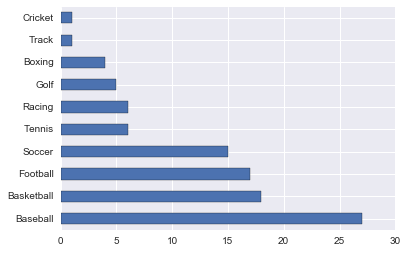

In [214]:
# df.groupby("sport").count()
df['sport'].value_counts().plot(kind="barh")

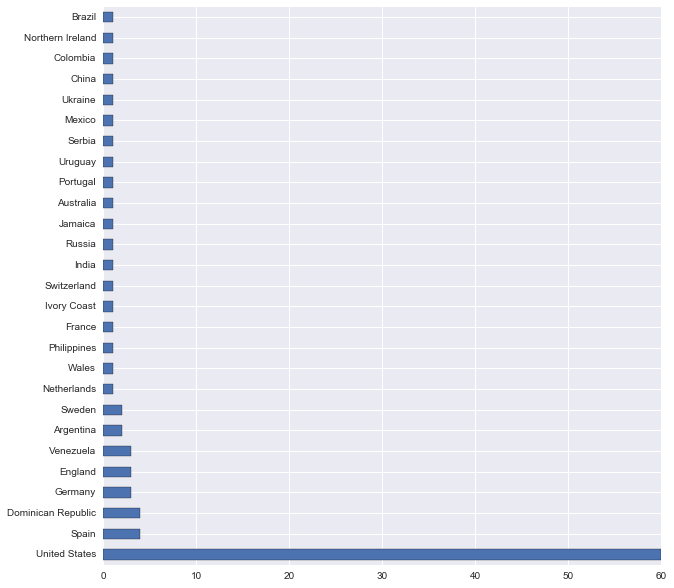

In [216]:
# df.groupby("sport").count()
df['nation'].value_counts().plot(kind="barh", figsize=(10, 10))

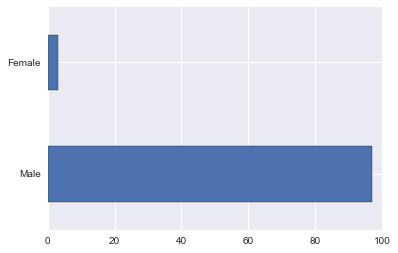

In [217]:
# df.groupby("sport").count()
df['gender'].value_counts().plot(kind="barh")

## Plot Females not in the united states and not baseball

In [218]:
sc.get_student()

'ben'

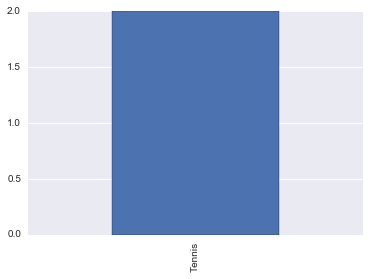

In [226]:
df[(df['nation'] != 'United States') & (df['sport'] != 'baseball') & (df['gender'] == 'Female')]['sport'].value_counts().plot(kind='bar')

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,100.0,50.30,2.890336e+01,1.0,25.75,50.5,75.00,100.0
total_pay,100.0,27513850.00,1.437813e+07,17300000.0,20400000.00,22650000.0,27325000.00,105000000.0
salary_winnings,100.0,20099000.00,1.175086e+07,200000.0,16500000.00,18700000.0,21925000.00,105000000.0
endorsements,100.0,7414850.00,1.180264e+07,0.0,400000.00,2500000.0,8250000.00,55000000.0
year_of_birth,100.0,1982.40,4.396969e+00,1970.0,1980.00,1983.0,1985.25,1992.0
birth_month,100.0,6.02,3.107437e+00,1.0,3.00,6.0,8.00,12.0
height_cm,100.0,187.86,1.177141e+01,150.0,182.50,188.0,193.50,213.0
year_of_birth_new,100.0,1982.40,4.396969e+00,1970.0,1980.00,1983.0,1985.25,1992.0
binary_gender,100.0,0.97,1.714466e-01,0.0,1.00,1.0,1.00,1.0


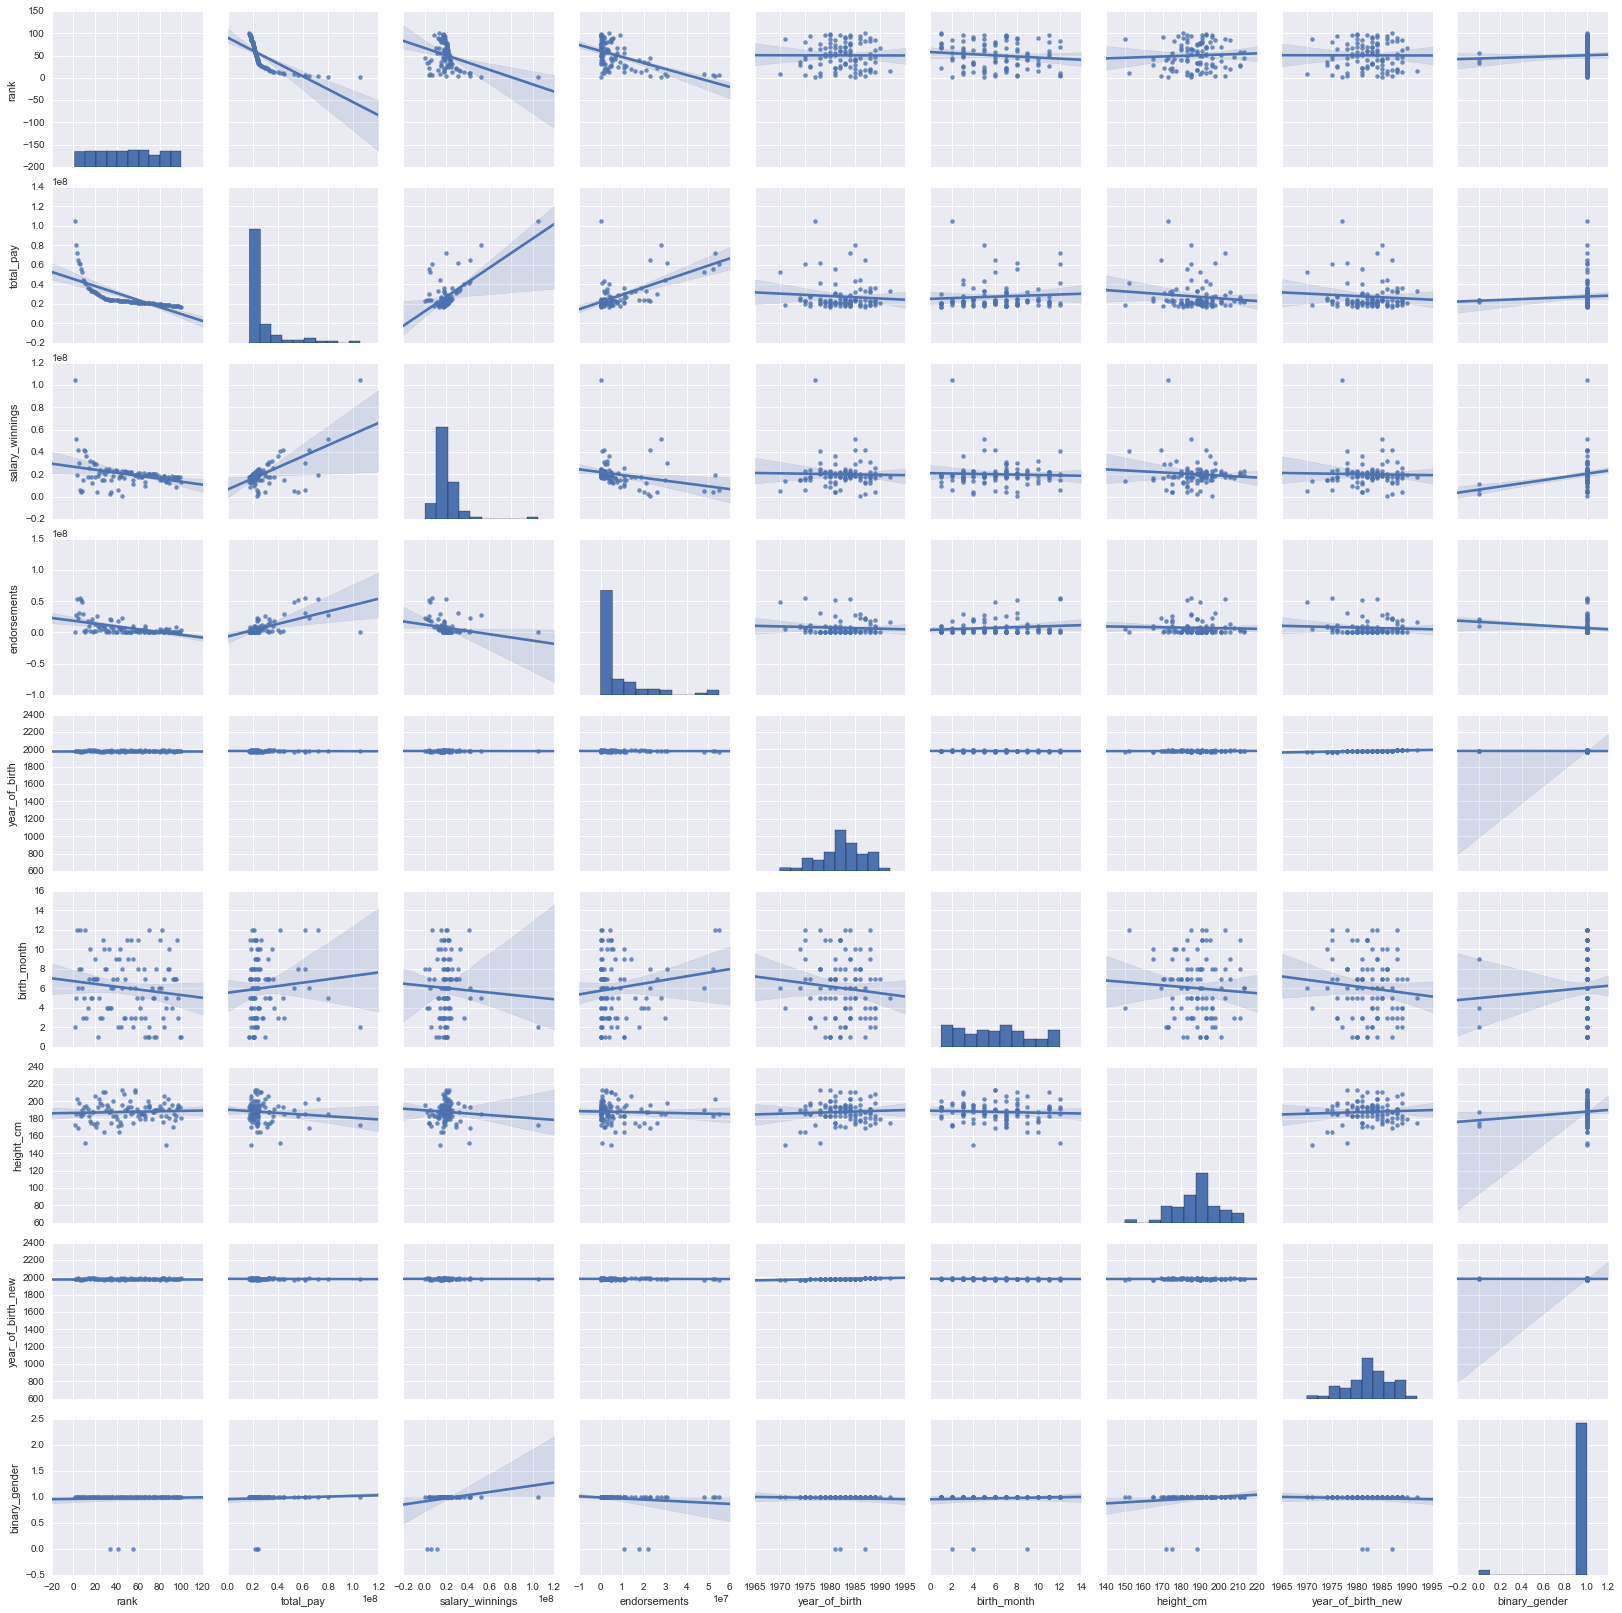

In [233]:
sns.pairplot(df, kind="reg")